In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
plt.style.use('fivethirtyeight')

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/ford-stock-data/F.csv


# Load the Data

In [2]:
df = pd.read_csv('/kaggle/input/ford-stock-data/F.csv')

In [3]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,1972-06-01,0.000000,2.173495,2.149165,2.153220,0.115848,1091238
1,1972-06-02,2.153220,2.173495,2.141055,2.149165,0.115630,1174468
2,1972-06-05,2.149165,2.169440,2.141055,2.149165,0.115630,5209582
3,1972-06-06,2.149165,2.157275,2.116725,2.124835,0.114321,1424158
4,1972-06-07,2.124835,2.137000,2.112670,2.112670,0.113666,675088


In [4]:
df.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [5]:
df['Date'] = pd.to_datetime(df['Date'])
df = df.set_index('Date')

In [6]:
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1972-06-01,0.000000,2.173495,2.149165,2.153220,0.115848,1091238
1972-06-02,2.153220,2.173495,2.141055,2.149165,0.115630,1174468
1972-06-05,2.149165,2.169440,2.141055,2.149165,0.115630,5209582
1972-06-06,2.149165,2.157275,2.116725,2.124835,0.114321,1424158
1972-06-07,2.124835,2.137000,2.112670,2.112670,0.113666,675088


In [7]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,12563.000000,12563.000000,12563.000000,12563.000000,12563.000000,1.256300e+04
mean,9.358873,9.478265,9.229561,9.352563,5.341977,2.205999e+07
std,7.091861,7.193142,6.991138,7.088909,4.979011,3.109448e+07
min,0.000000,0.648804,0.638667,0.643736,0.059245,2.990110e+05
25%,2.607890,2.638303,2.570888,2.600287,0.294043,4.345223e+06
50%,8.895718,8.986956,8.790000,8.895718,4.501335,8.849370e+06
75%,12.560000,12.700000,12.408386,12.560000,9.198862,3.003010e+07
max,36.819485,37.300335,35.720394,36.647751,25.061152,5.411756e+08


In [8]:
corr = df.corr()
corr.style.background_gradient(cmap = 'coolwarm')

,Open,High,Low,Close,Adj Close,Volume
Open,1.000000,0.999758,0.999738,0.999534,0.908477,0.121202
High,0.999758,1.000000,0.999667,0.999786,0.908536,0.123924
Low,0.999738,0.999667,1.000000,0.999773,0.908462,0.116517
Close,0.999534,0.999786,0.999773,1.000000,0.908689,0.120316
Adj Close,0.908477,0.908536,0.908462,0.908689,1.000000,0.345373
Volume,0.121202,0.123924,0.116517,0.120316,0.345373,1.000000


# Visualization

<AxesSubplot:xlabel='Date'>

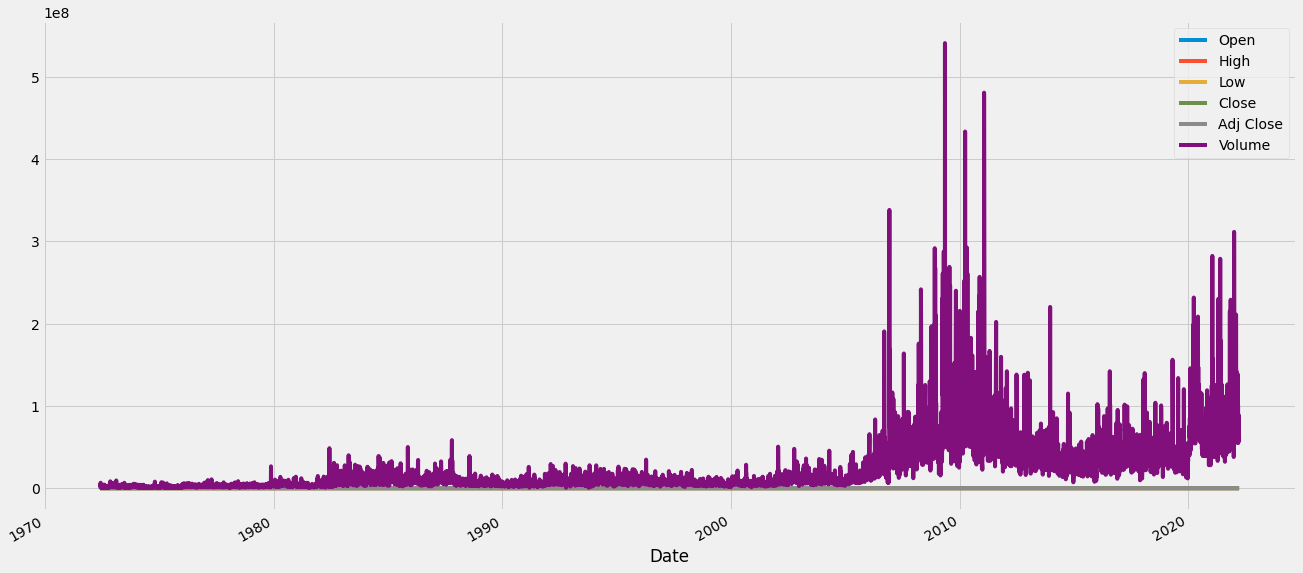

In [9]:
df.plot(figsize = (20,10))

Text(0.5, 1.0, 'Open and Close Prices Ford')

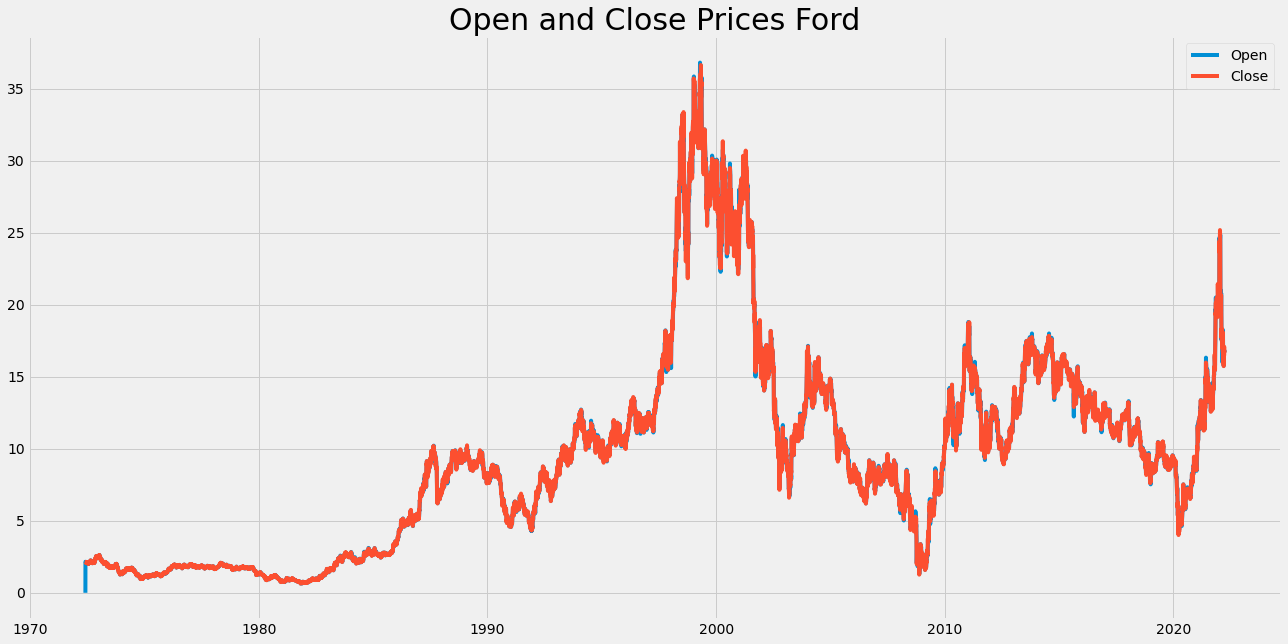

In [10]:
plt.figure(figsize =(20,10))
plt.plot(df['Open'])
plt.plot(df['Close'])
plt.legend(['Open','Close'])
plt.title('Open and Close Prices Ford', fontsize = 30)

Text(0.5, 1.0, 'High and Low price')

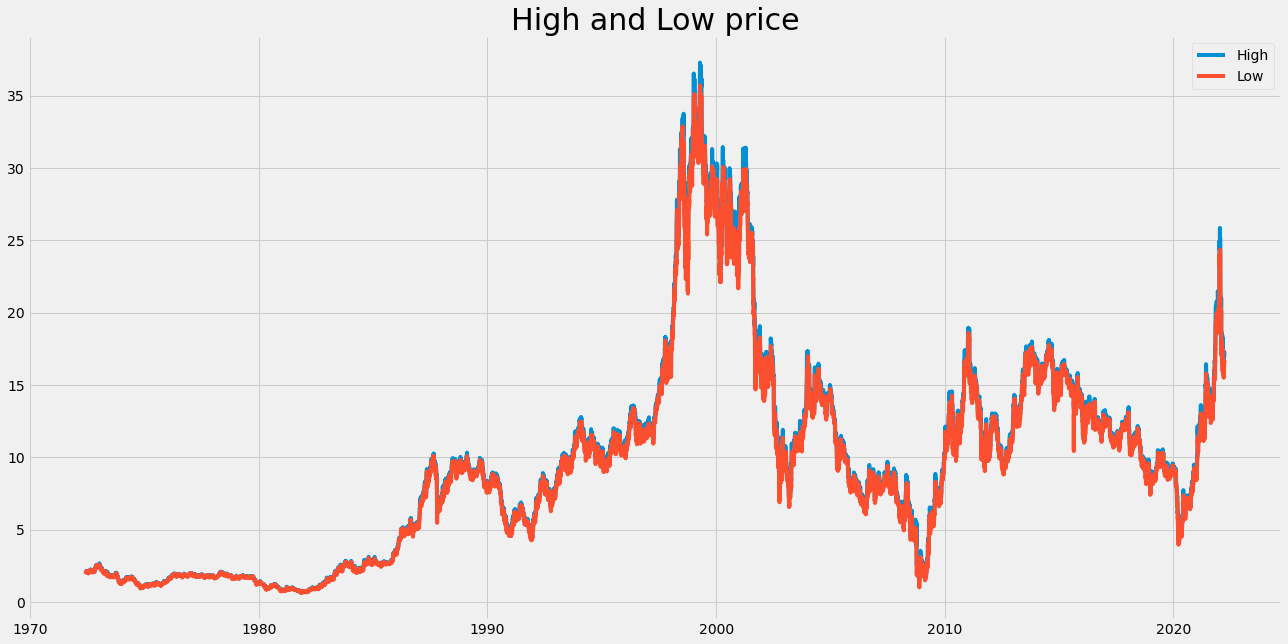

In [11]:
plt.figure(figsize = (20,10))
plt.plot(df['High'])
plt.plot(df['Low'])
plt.legend(['High','Low'])
plt.title('High and Low price', fontsize = 30)


Text(0.5, 1.0, 'Volume')

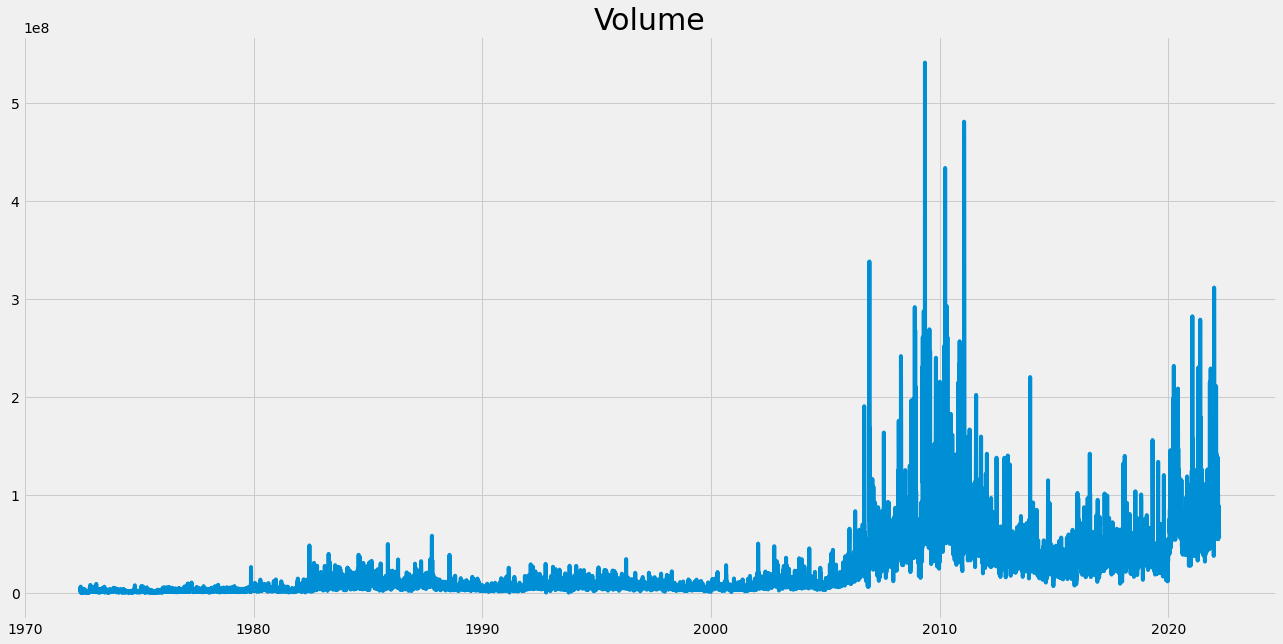

In [12]:
plt.figure(figsize =(20,10))
plt.plot(df['Volume'])
plt.title('Volume', fontsize = 30)

In [13]:
df['PriceDiff'] = df['Close'].shift(-1) - df['Close']
print(df['PriceDiff'])
df = df.dropna()

Date
1972-06-01   -0.004055
1972-06-02    0.000000
1972-06-05   -0.024330
1972-06-06   -0.012165
1972-06-07   -0.016221
                ...   
2022-03-18   -0.380001
2022-03-21    0.610000
2022-03-22   -0.410000
2022-03-23    0.150000
2022-03-24         NaN
Name: PriceDiff, Length: 12563, dtype: float64


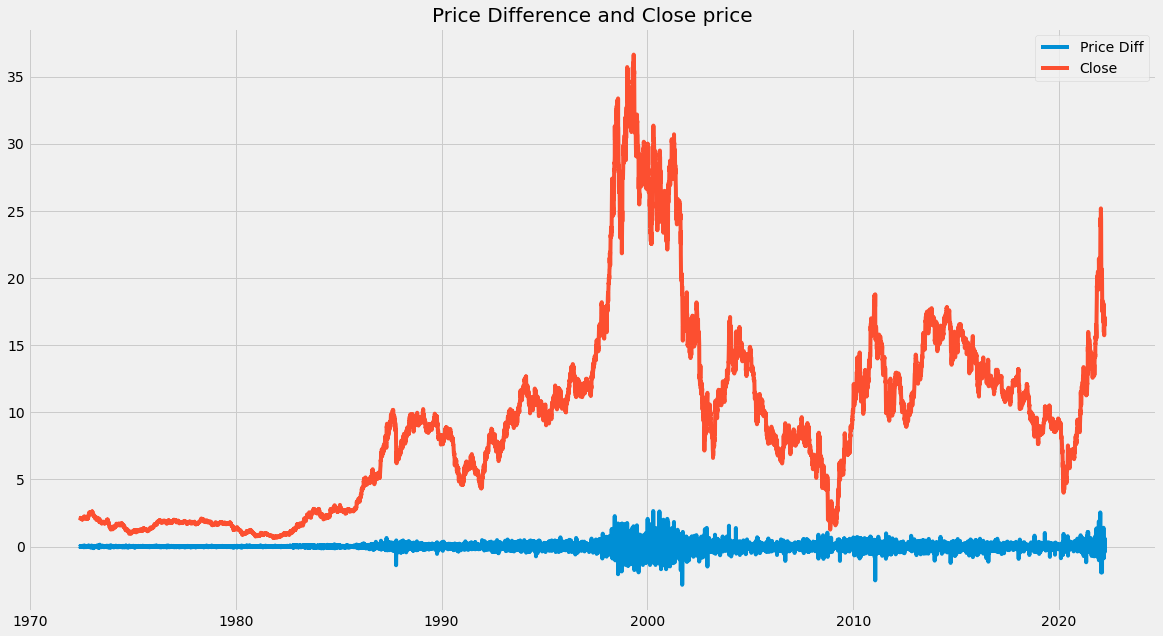

In [14]:
plt.figure(figsize = (18,10))
plt.plot(df['PriceDiff'])
plt.plot(df['Close'])
plt.legend(['Price Diff','Close'])
plt.title('Price Difference and Close price', fontsize = 20)
plt.show()


In [15]:
df['MA10'] = df['Close'].rolling(10).mean()
df['MA50'] = df['Close'].rolling(50).mean()

df['MA30'] = df['Close'].rolling(30).mean()
df['MA100'] = df['Close'].rolling(100).mean()

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen

In [16]:
df['Shares'] = [1 if df.loc[ei, 'MA10']> df.loc[ei,'MA50']else 0 for ei in df.index]

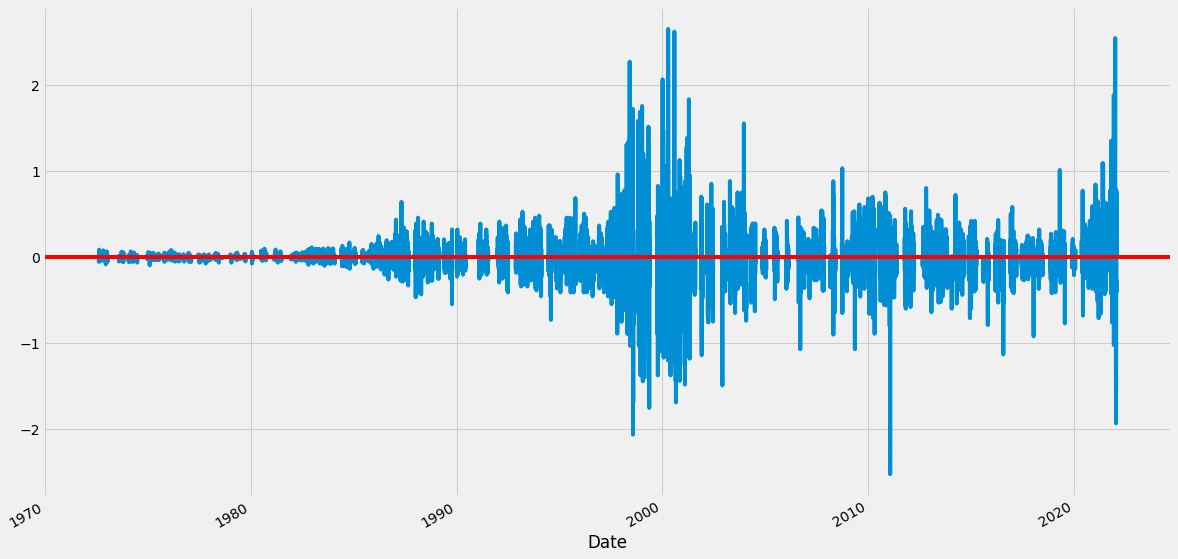

In [17]:
df['Close1'] = df['Close'].shift(-1)
df['Profit'] = [df.loc[ei,'Close1']- df.loc[ei,'Close']if df.loc[ei,'Shares']== 1 else 0 for ei in df.index]
plt.figure(figsize = (18,10))
df['Profit'].plot()
plt.axhline(y = 0, color = 'red')

In [18]:
df['wealth'] = df['Profit'].cumsum()

In [19]:
df.tail()

,Open,High,Low,Close,Adj Close,Volume,PriceDiff,MA10,MA50,MA30,MA100,Shares,Close1,Profit,wealth
Date,,,,,,,,,,,,,,,
2022-03-17,16.230000,16.580000,16.160000,16.580000,16.580000,58500200,0.280001,16.255,19.2766,17.276667,19.4355,0,16.860001,0.0,36.809994
2022-03-18,16.420000,16.900000,16.280001,16.860001,16.860001,89050700,-0.380001,16.256,19.1406,17.175667,19.4441,0,16.480000,0.0,36.809994
2022-03-21,16.870001,17.110001,16.330000,16.480000,16.480000,72583600,0.610000,16.307,18.9810,17.126333,19.4495,0,17.090000,0.0,36.809994
2022-03-22,16.719999,17.309999,16.700001,17.090000,17.090000,77647100,-0.410000,16.413,18.8340,17.099667,19.4653,0,16.680000,0.0,36.809994
2022-03-23,16.820000,17.049999,16.570000,16.680000,16.680000,63296800,0.150000,16.444,18.6906,17.065000,19.4635,0,NaN,0.0,36.809994


Text(0.5, 1.0, 'Total Money you have made: 36.80999400000003')

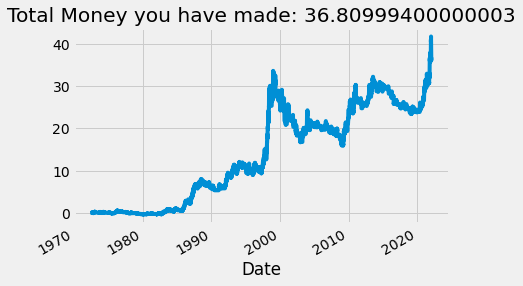

In [20]:
df['wealth'].plot()
plt.title('Total Money you have made: {}'.format(df.loc[df.index[-2],'wealth']))

In [21]:
df['LogReturn'] = np.log(df['Close']).shift(-1) - np.log(df['Close'])
print(df['LogReturn'])

Date
1972-06-01   -0.001885
1972-06-02    0.000000
1972-06-05   -0.011385
1972-06-06   -0.005742
1972-06-07   -0.007708
                ...   
2022-03-17    0.016747
2022-03-18   -0.022796
2022-03-21    0.036346
2022-03-22   -0.024283
2022-03-23         NaN
Name: LogReturn, Length: 12562, dtype: float64


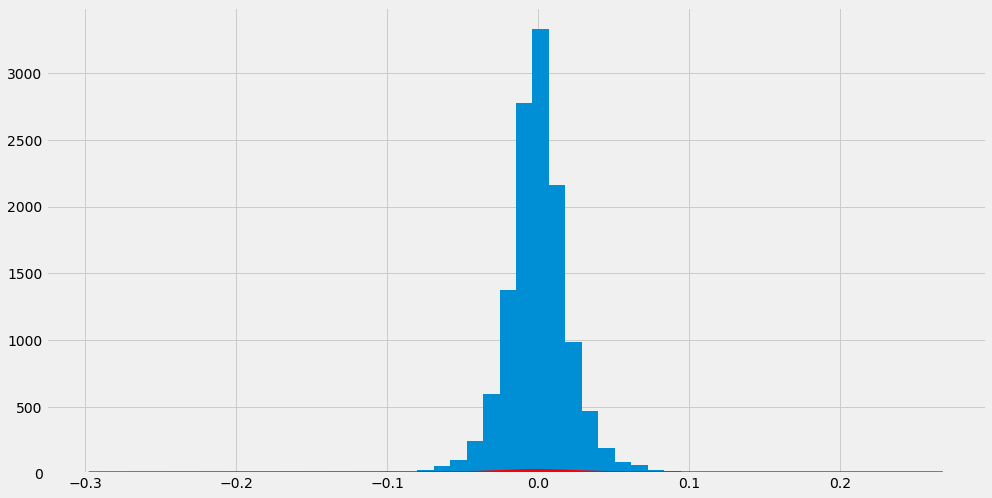

In [22]:
from scipy.stats import norm
mu = df['LogReturn'].mean()
sigma = df['LogReturn'].std(ddof=1)

density = pd.DataFrame()
density['x'] = np.arange(df['LogReturn'].min()-0.01,df['LogReturn'].max()+0.01, 0.001)
density['pdf'] = norm.pdf(density['x'], mu, sigma)

df['LogReturn'].hist(bins=50, figsize=(15, 8))
plt.plot(density['x'],density['pdf'], color ='red')
plt.show()

In [23]:
df['logReturn'] = np.log(df['Close'].shift(-1))-np.log(df['Close'])
sample_size = df['logReturn'].shape[0]
sample_mean = df['logReturn'].mean()
sample_std = df['logReturn'].std(ddof=1)/ sample_size**0.5

# left and right Quantile
z_left = norm.ppf(0.05)
z_right = norm.ppf(0.95)

#upper and lower bound
interval_left = sample_mean+z_left*sample_std
interval_right = sample_mean+z_right*sample_std

In [24]:
print('90% confidence interval is ',(interval_left, interval_right))

90% confidence interval is  (-0.00016574824077787, 0.0004917168739708063)


# Augmented Dickey-Fuller Test

In [25]:
from statsmodels.tsa.stattools import adfuller

def adf_test(timeseries):
    #Perform Dickey-Fuller test:
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
       dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput)

In [26]:
print(adf_test(df['High']))

Results of Dickey-Fuller Test:
Test Statistic                    -1.914463
p-value                            0.325288
#Lags Used                        40.000000
Number of Observations Used    12521.000000
Critical Value (1%)               -3.430872
Critical Value (5%)               -2.861771
Critical Value (10%)              -2.566893
dtype: float64
None


In [27]:
print(adf_test(df['High'].resample('MS').mean()))

Results of Dickey-Fuller Test:
Test Statistic                  -2.409196
p-value                          0.139158
#Lags Used                      13.000000
Number of Observations Used    584.000000
Critical Value (1%)             -3.441597
Critical Value (5%)             -2.866502
Critical Value (10%)            -2.569412
dtype: float64
None


In [28]:
for_month = df.resample('M').mean()
df['Returns'] = df['PriceDiff'] / df['Close']
df = df.dropna()


Results of Dickey-Fuller Test:
Test Statistic                -5.960811e+00
p-value                        2.041201e-07
#Lags Used                     1.900000e+01
Number of Observations Used    5.730000e+02
Critical Value (1%)           -3.441814e+00
Critical Value (5%)           -2.866597e+00
Critical Value (10%)          -2.569463e+00
dtype: float64
None


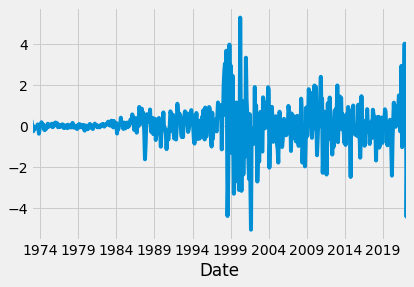

In [29]:
for_diff = df['Open'].resample('MS').mean() - df['Open'].resample('MS').mean().shift(1)
for_open_diff = for_diff.dropna()
for_open_diff.plot()

print(adf_test(for_open_diff))

<AxesSubplot:xlabel='High', ylabel='Returns'>

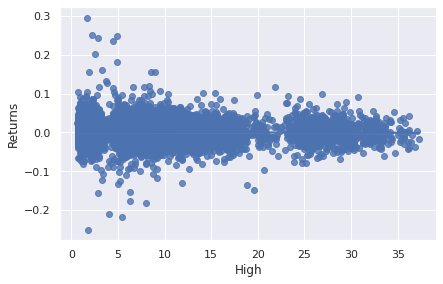

In [30]:
sns.set(color_codes = True)
sns.regplot(x = 'High', y = 'Returns', data = df)

# Buy and Sell Flags

In [31]:
data = pd.DataFrame()
data['Ford'] = df['Adj Close']
data['MA30'] = df['MA30']
data['MA100'] = df['MA100']

In [32]:
def buy_sell(data):
    sigPriceBuy = []
    sigPriceSell = []
    flag = -1

    for i in range(len(data)):
        if data['MA30'][i] > data['MA100'][i]:
            if flag != 1:
                sigPriceBuy.append(data['Ford'][i])
                sigPriceSell.append(np.nan)
                flag = 1
            else:
                sigPriceBuy.append(np.nan)
                sigPriceSell.append(np.nan)
        elif data['MA30'][i] < data['MA100'][i]:
            if flag != 0:
                sigPriceBuy.append(np.nan)
                sigPriceSell.append(data['Ford'][i])
                flag = 0
            else:
                sigPriceBuy.append(np.nan)
                sigPriceSell.append(np.nan)
        else:
            sigPriceBuy.append(np.nan)
            sigPriceSell.append(np.nan)

    return (sigPriceBuy,sigPriceSell)

In [33]:
buy_sell = buy_sell(data)
data['Buy_Signal_Price'] = buy_sell[0]
data['Sell_Signal_Price'] = buy_sell[1]

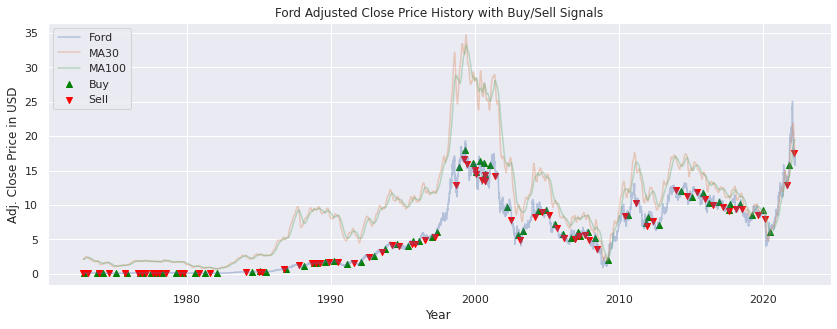

In [34]:
plt.figure(figsize=(12.5,4.5))
plt.plot(data['Ford'], label = 'Ford', alpha=0.35)
plt.plot(data['MA30'], label = 'MA30', alpha=0.35)
plt.plot(data['MA100'], label = 'MA100', alpha=0.35)
plt.scatter(data.index, data['Buy_Signal_Price'], label = 'Buy', marker = '^', color = 'green')
plt.scatter(data.index, data['Sell_Signal_Price'], label = 'Sell', marker = 'v', color = 'red')
plt.title('Ford Adjusted Close Price History with Buy/Sell Signals')
plt.xlabel('Year')
plt.ylabel('Adj. Close Price in USD')
plt.legend(loc='upper left')
plt.show()

# Seasonal Decompose

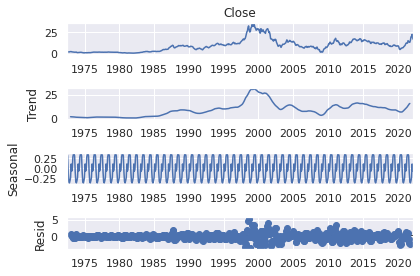

In [35]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(for_month.Close, model='additive')
fig = decomposition.plot()
plt.show()



<AxesSubplot:xlabel='Date'>

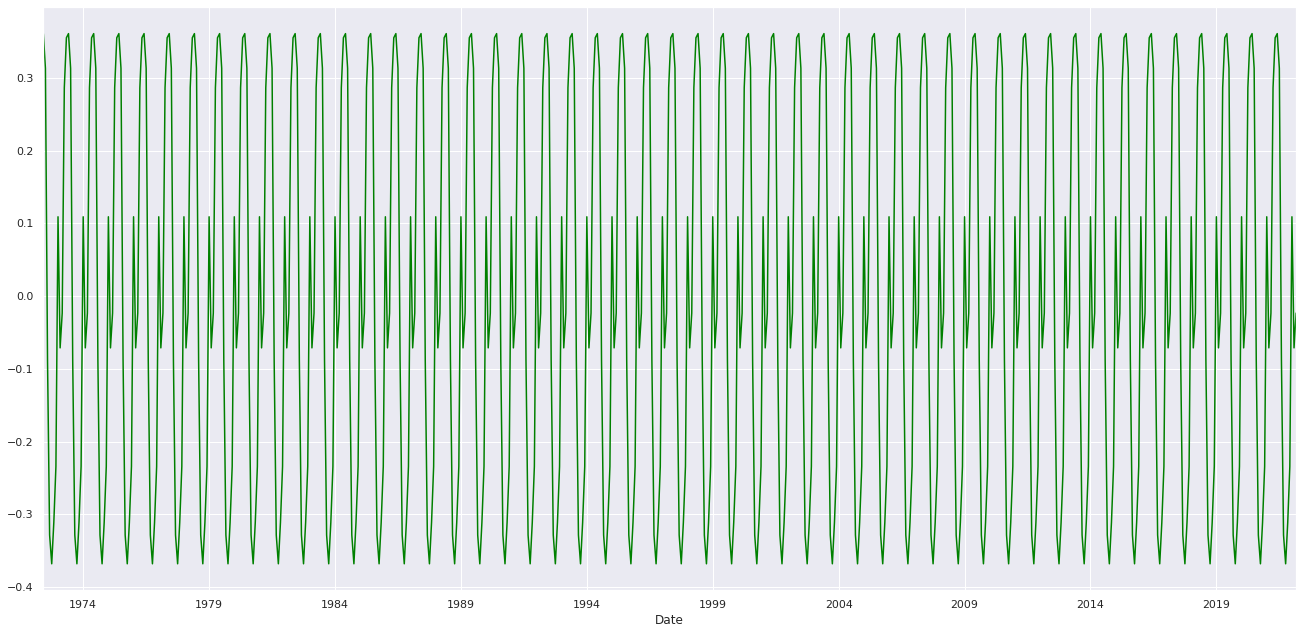

In [36]:
seasonality = decomposition.seasonal
seasonality.plot(color = 'green',figsize = (20,10))

<AxesSubplot:xlabel='y(t)', ylabel='y(t + 1)'>

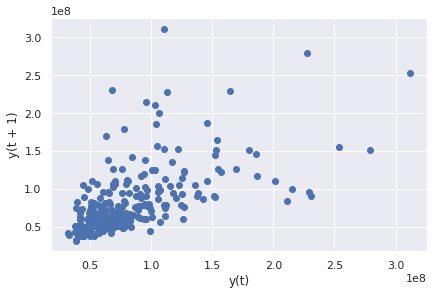

In [37]:
from pandas.plotting import lag_plot
lag_plot(df['Volume'].tail(250))

# Autocorrelation Plots

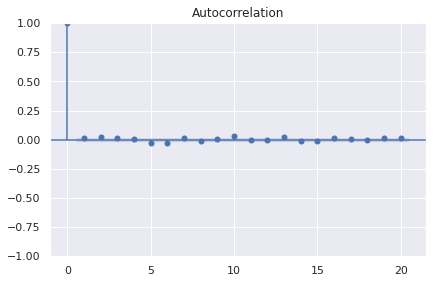

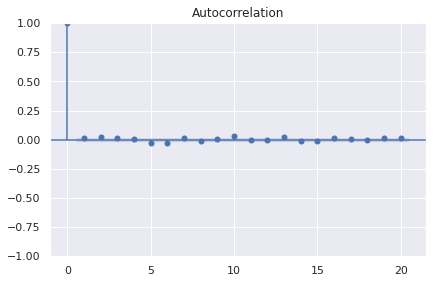

In [38]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
plot_acf(df['Returns'], lags = 20)

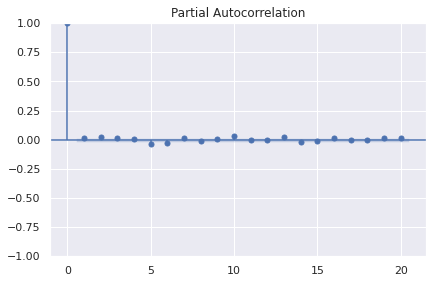

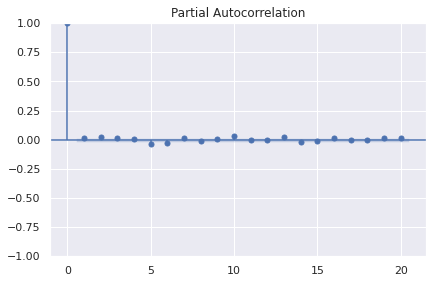

In [39]:
plot_pacf(df['Returns'],lags=20,method='ols')

# ARIMA

In [40]:
from statsmodels.tsa.api import ARIMA
model = ARIMA(df['Close'],order=(0,1,0))
result = model.fit()
print(result.aic)


/opt/conda/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/conda/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/conda/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


1512.636831998557


In [41]:
model1 = ARIMA(df['Close'],order=(0,0,1))
result1 =  model1.fit()
print(result1.aic)

/opt/conda/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/conda/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/conda/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


67582.15570057562


In [42]:
model2 = ARIMA(df['Close'],order = (1,0,0))
result2 = model2.fit()
print(result2.aic)

/opt/conda/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/conda/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/conda/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


1519.4095264684836


In [43]:
residuals = pd.DataFrame(result.resid)
residuals = residuals.iloc[1:]

In [44]:
residuals.describe()

,0
count,12461.000000
mean,0.001203
std,0.257099
min,-2.850001
25%,-0.070000
50%,0.000000
75%,0.070000
max,2.644682


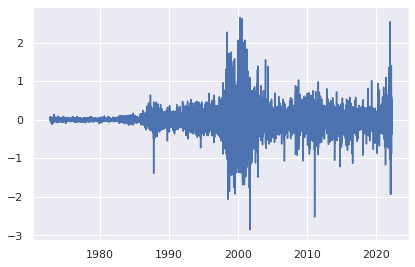

In [45]:
plt.plot(residuals)
plt.show()

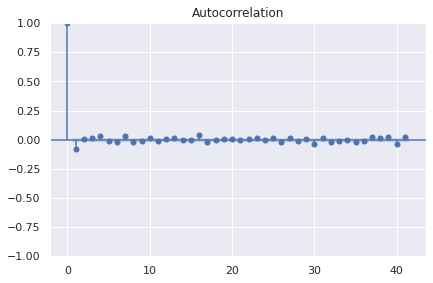

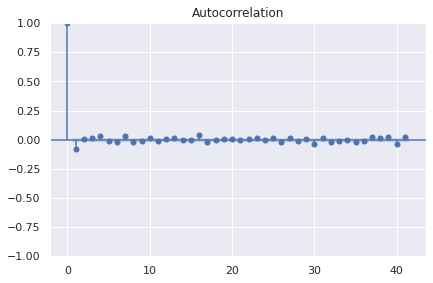

In [46]:
plot_acf(residuals)

/opt/conda/lib/python3.7/site-packages/statsmodels/graphics/tsaplots.py:353: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  FutureWarning,


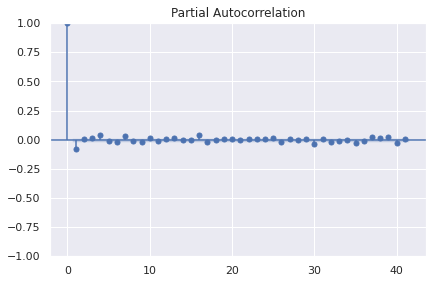

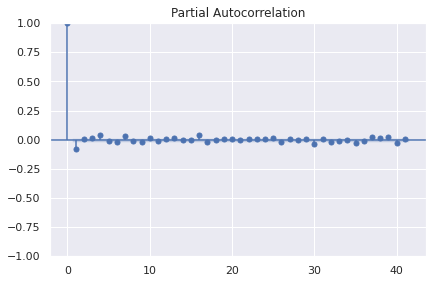

In [47]:
plot_pacf(residuals)


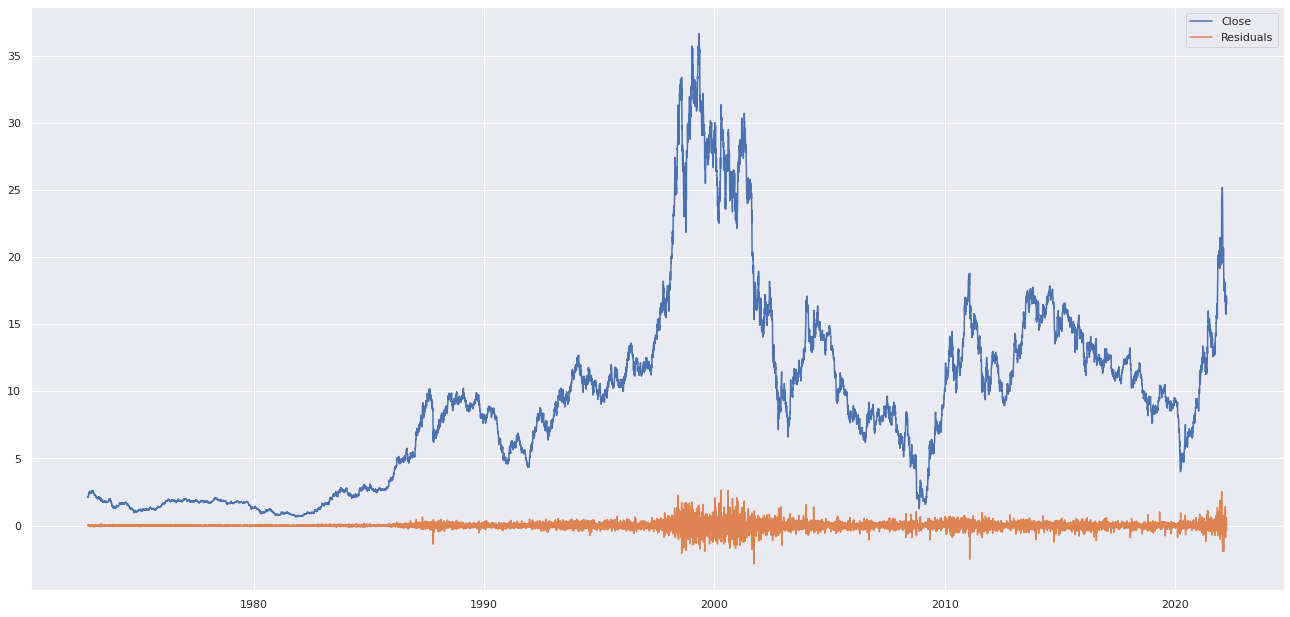

In [48]:
plt.figure(figsize=(20,10))
plt.plot(df[['Close']])
plt.plot(residuals)
plt.legend(['Close','Residuals'])

# KPSS

In [49]:
from statsmodels.tsa.stattools import kpss

In [50]:
def kpss_test(timeseries):
    print("Results of KPSS Test:")
    kpsstest = kpss(timeseries, regression="c", nlags="auto")
    kpss_output = pd.Series(
        kpsstest[0:3], index=["Test Statistic", "p-value", "Lags Used"]
    )
    for key, value in kpsstest[3].items():
        kpss_output["Critical Value (%s)" % key] = value
    print(kpss_output)

def kpss_test(timeseries):
    print("Results of KPSS Test:")
    kpsstest = kpss(timeseries, regression="c", nlags="auto")
    kpss_output = pd.Series(
        kpsstest[0:3], index=["Test Statistic", "p-value", "Lags Used"]
    )
    for key, value in kpsstest[3].items():
        kpss_output["Critical Value (%s)" % key] = value
    print(kpss_output)



In [51]:
kpss_test(df['High'])

Results of KPSS Test:
Test Statistic            6.883974
p-value                   0.010000
Lags Used                69.000000
Critical Value (10%)      0.347000
Critical Value (5%)       0.463000
Critical Value (2.5%)     0.574000
Critical Value (1%)       0.739000
dtype: float64


/opt/conda/lib/python3.7/site-packages/statsmodels/tsa/stattools.py:2019: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  warn_msg.format(direction="smaller"), InterpolationWarning


<AxesSubplot:xlabel='Date'>

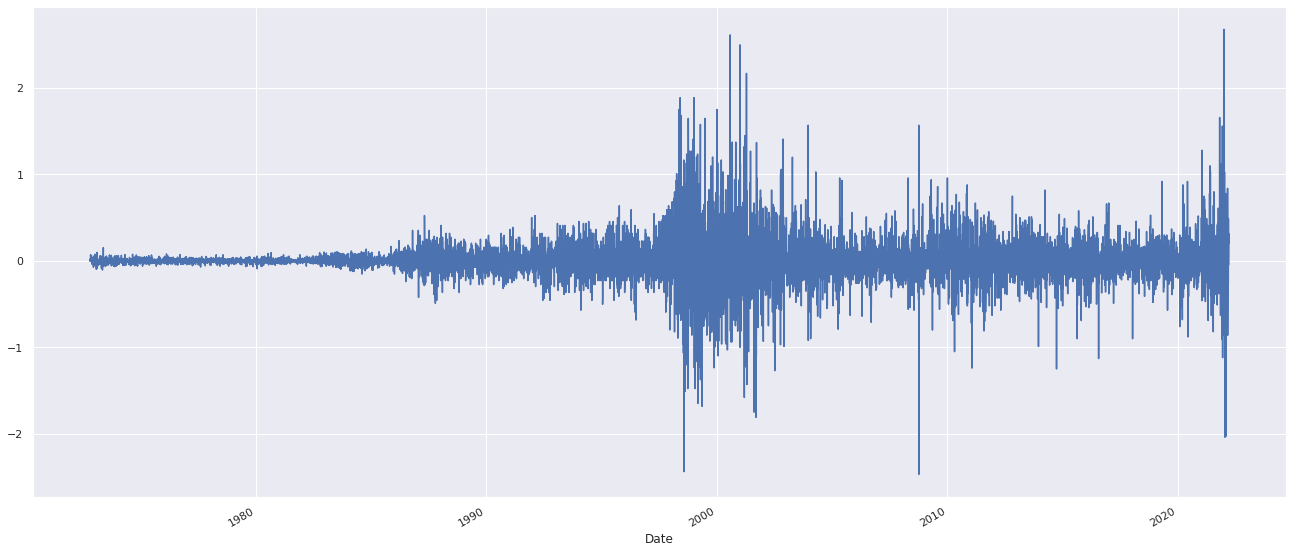

In [52]:
df['High_diff'] = df['High'] - df['High'].shift(1)
df['High_diff'].dropna().plot(figsize = (20,10))

In [53]:
kpss_test(df['High_diff'].dropna())

Results of KPSS Test:
Test Statistic            0.048657
p-value                   0.100000
Lags Used                15.000000
Critical Value (10%)      0.347000
Critical Value (5%)       0.463000
Critical Value (2.5%)     0.574000
Critical Value (1%)       0.739000
dtype: float64


/opt/conda/lib/python3.7/site-packages/statsmodels/tsa/stattools.py:2023: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  warn_msg.format(direction="greater"), InterpolationWarning


In [54]:
kpss_test(df['High_diff'].resample('MS').mean().dropna())

Results of KPSS Test:
Test Statistic           0.051364
p-value                  0.100000
Lags Used                2.000000
Critical Value (10%)     0.347000
Critical Value (5%)      0.463000
Critical Value (2.5%)    0.574000
Critical Value (1%)      0.739000
dtype: float64


/opt/conda/lib/python3.7/site-packages/statsmodels/tsa/stattools.py:2023: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  warn_msg.format(direction="greater"), InterpolationWarning


In [55]:
kpss_test(df['High_diff'].resample('MS').std().dropna())

Results of KPSS Test:
Test Statistic            1.461382
p-value                   0.010000
Lags Used                15.000000
Critical Value (10%)      0.347000
Critical Value (5%)       0.463000
Critical Value (2.5%)     0.574000
Critical Value (1%)       0.739000
dtype: float64


/opt/conda/lib/python3.7/site-packages/statsmodels/tsa/stattools.py:2019: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  warn_msg.format(direction="smaller"), InterpolationWarning


In [56]:
adf_test(df['High_diff'].dropna())

Results of Dickey-Fuller Test:
Test Statistic                -1.777141e+01
p-value                        3.306270e-30
#Lags Used                     3.900000e+01
Number of Observations Used    1.242100e+04
Critical Value (1%)           -3.430877e+00
Critical Value (5%)           -2.861773e+00
Critical Value (10%)          -2.566894e+00
dtype: float64


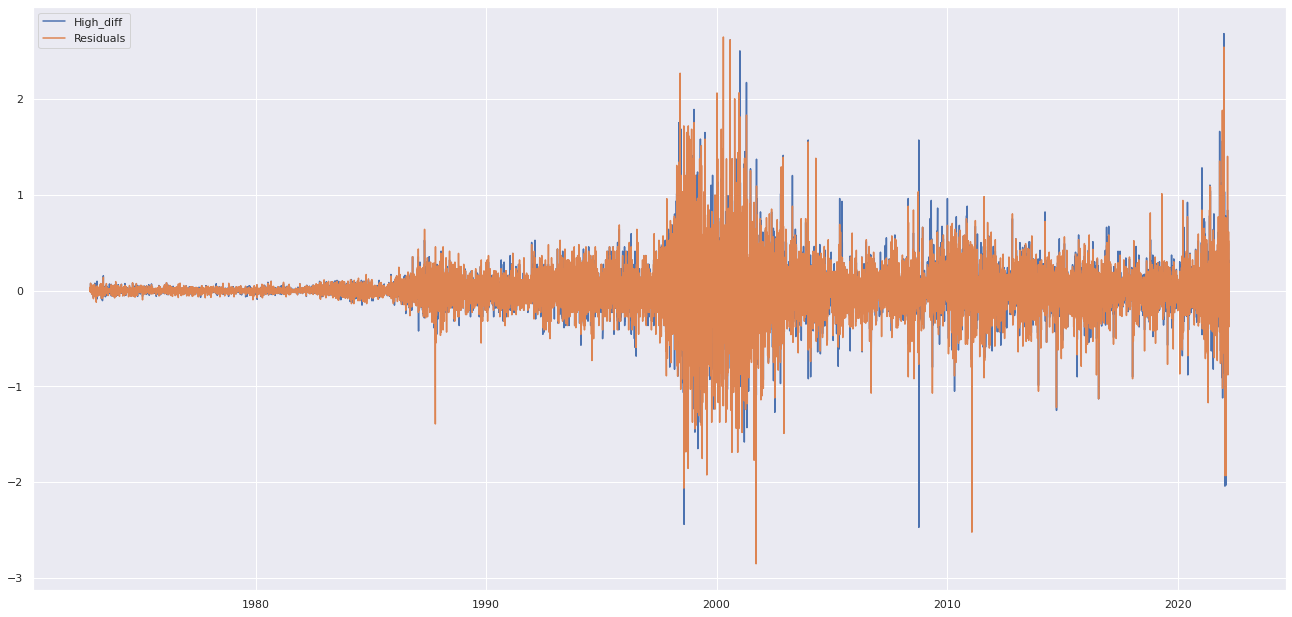

In [57]:
plt.figure(figsize = (20,10))
plt.plot(df['High_diff'])
plt.plot(residuals)
plt.legend(['High_diff','Residuals'])
plt.show()

In [58]:
df = df.dropna()

# Further Machine Learning Modeling

In [59]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error,mean_squared_error, median_absolute_error,confusion_matrix,accuracy_score,r2_score

from sklearn.linear_model import LinearRegression, ARDRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.svm import SVR 
from xgboost import XGBRegressor

In [60]:
# Defined X value and y value, and split the data train.
X = df.drop(columns = 'Volume')
y = df['Volume']

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.25, random_state = 42)

print('X Train : ', X_train.shape)
print('X Test : ', X_test.shape)
print('Y Train : ', y_train.shape)
print('Y Test : ', y_test.shape)

X Train :  (9345, 18)
X Test :  (3116, 18)
Y Train :  (9345,)
Y Test :  (3116,)


In [61]:
LR = LinearRegression()
DTR = DecisionTreeRegressor(criterion = 'friedman_mse',splitter='best')
RFR = RandomForestRegressor()
KNR = KNeighborsRegressor(n_neighbors=10,weights='uniform',algorithm='auto',leaf_size=50, p=15)
MLP = MLPRegressor(solver='adam',max_iter = 500)
XGB = XGBRegressor(n_estimators=100,max_depth=5,min_child_weight=1,subsample=1,colsample_bytree=1,
                   learning_rate=0.15)
SVR=SVR(kernel = 'poly')

In [62]:
# make for loop for Regression 

li = [LR,DTR,RFR,KNR,MLP,KNR,XGB,SVR]
d = {}
for i in li:
    i.fit(X_train,y_train)
    ypred = i.predict(X_test)
    print(i,":",r2_score(y_test,ypred)*100)
    d.update({str(i):i.score(X_test,y_test)*100})

LinearRegression() : 60.5889845991476
DecisionTreeRegressor(criterion='friedman_mse') : 54.060986302768235
RandomForestRegressor() : 78.30823853936944
KNeighborsRegressor(leaf_size=50, n_neighbors=10, p=15) : 77.72712050202753


/opt/conda/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


MLPRegressor(max_iter=500) : -34.611678737360975
KNeighborsRegressor(leaf_size=50, n_neighbors=10, p=15) : 77.72712050202753
XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.15, max_delta_step=0,
             max_depth=5, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=4,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None) : 79.91136630657769
SVR(kernel='poly') : -18.331103405184066


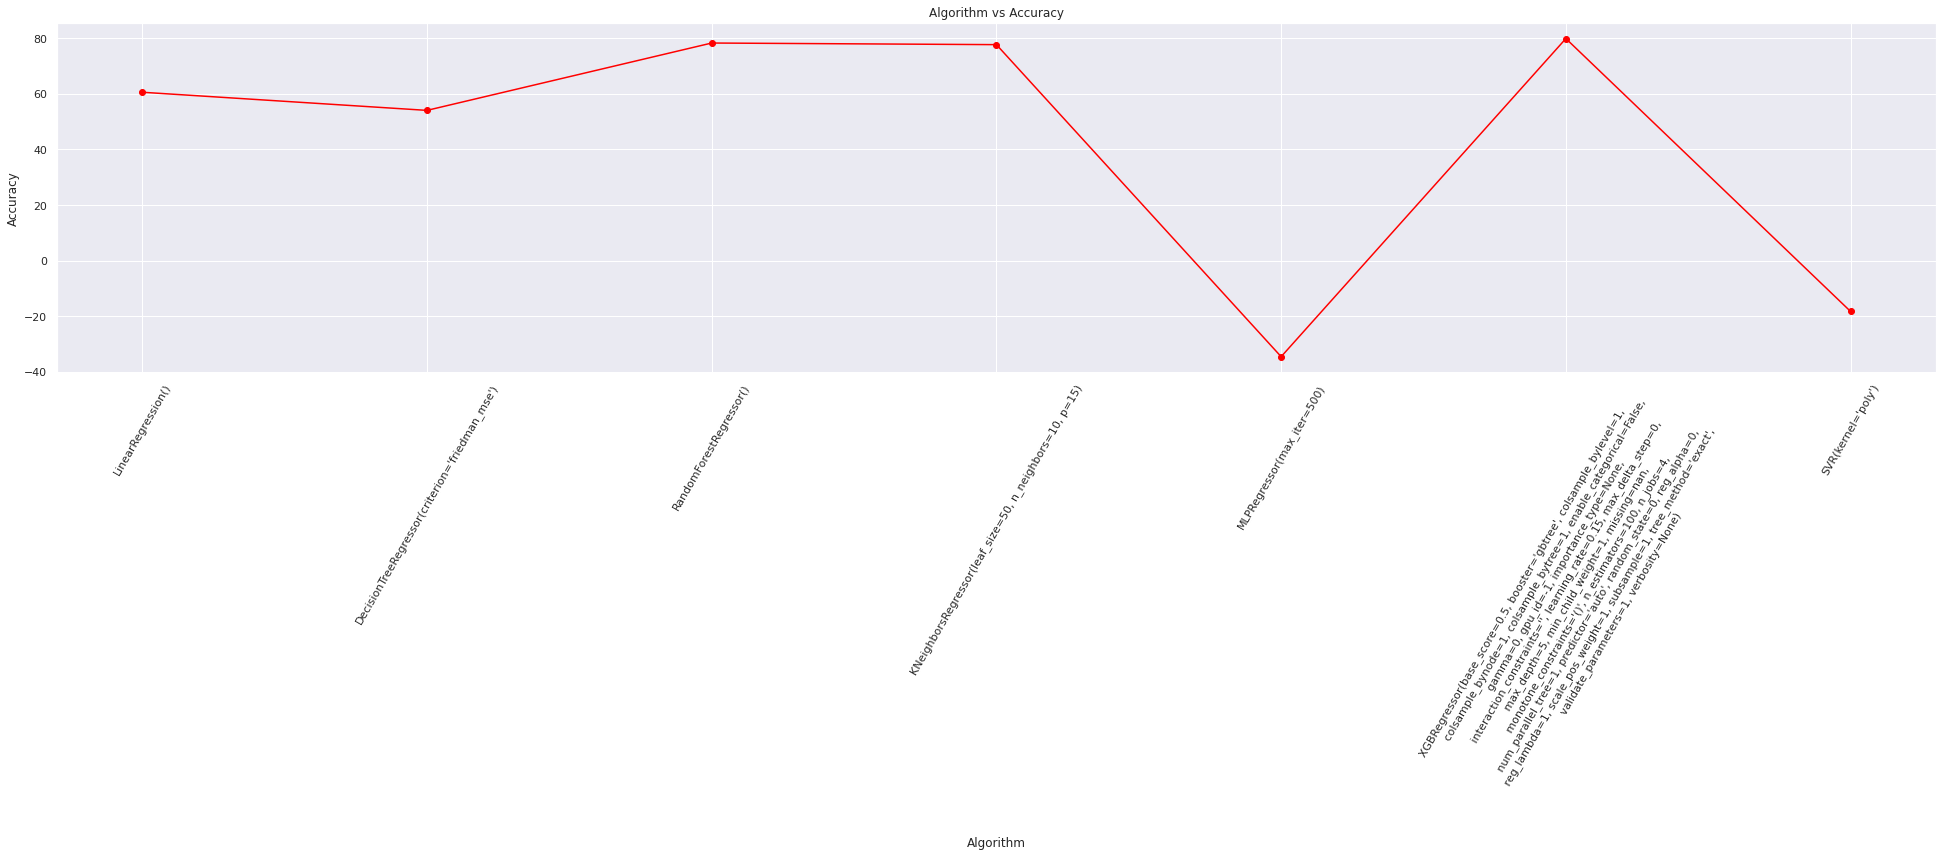

In [63]:
plt.figure(figsize=(30, 6))
plt.title("Algorithm vs Accuracy")
plt.xlabel("Algorithm")
plt.ylabel("Accuracy")
plt.plot(d.keys(),d.values(),marker='o',color='red')
plt.xticks(rotation =60)
plt.show()

In [64]:
xgb_model = XGBRegressor(n_estimators=100,max_depth=5,min_child_weight=1,subsample=1,colsample_bytree=1,
                   learning_rate=0.15)
xgb_model.fit(X_train, y_train)

print("Score the X-Train with Y-train is : ",xgb_model.score(X_train, y_train))
print('Score the X-Test with Y-test is : ', xgb_model.score(X_test,y_test))

y_pred_xgb = xgb_model.predict(X_test)

print(' The R2Score XGB Model ', r2_score(y_test, y_pred_xgb))

Score the X-Train with Y-train is :  0.9267608453230914
Score the X-Test with Y-test is :  0.7991136630657769
 The R2Score XGB Model  0.7991136630657769


# XGB Tree Plot

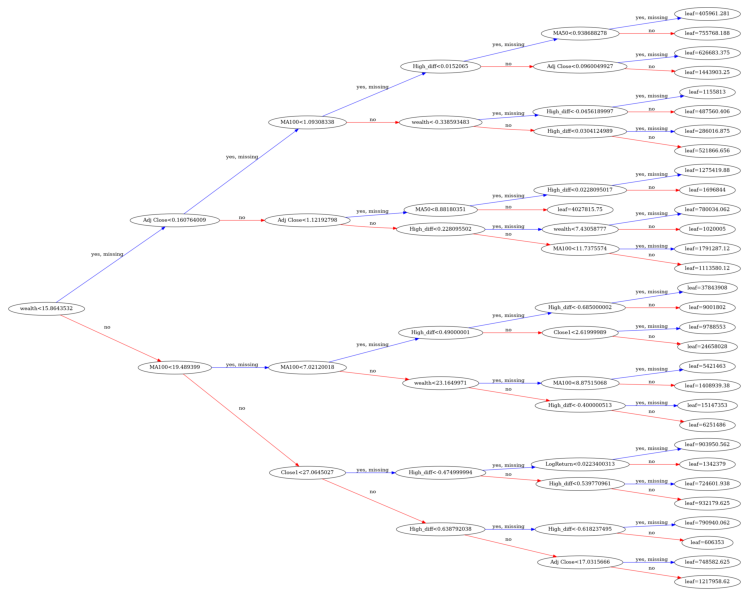

In [65]:
from xgboost import plot_tree
fig,ax = plt.subplots(figsize = (20,10))
fig= plot_tree(xgb_model,num_trees = 1, rankdir ='LR',ax = ax)


